# Purpose:

This notebook will produce 3 plots, which compare how 3 critics trained on the 3 eval functions perform on all 3 eval functions. I hope that what it shows in the end is that the one trained specifically for a given metric does best on it. I really hope.

This notebook will read 5 data files. The first is, the 100 epoch base. Then, there are 3 50-epoch AC trainings, based on the 3 critics. Finally, there is a 50-epoch base training again, to make the graph have a comparison. This last part doesn't matter quite as much.


In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
sns.set()

In [2]:
"""First, we want to load the data"""

with open("./data/base_actor.json", "r") as f:
    data_base = json.loads(f.read())

with open("./data/ndcg_trained_critic.json", "r") as f:
    data_ndcg_critic = json.loads(f.read())

with open("./data/ap_trained_critic.json", "r") as f:
    data_ap_critic = json.loads(f.read())

with open("./data/recall_trained_critic.json", "r") as f:
    data_recall_critic = json.loads(f.read())
    
print("Great Success!")


Great Success!


Have 200 rows of data for ndcg
200
100


(0.42, 0.45)

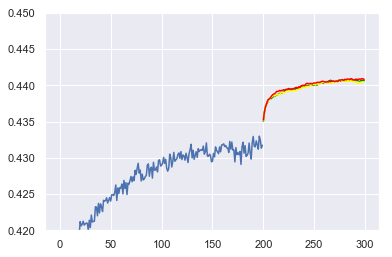

In [3]:
"""First, we make a graph of just the actor's data for NDCG"""

actor_ndcg_data = data_base['ACTOR']['ndcg']
ndcg_critic_data = data_ndcg_critic['AC']['ndcg']
ap_critic_data = data_ap_critic['AC']['ndcg']
recall_critic_data = data_recall_critic['AC']['ndcg']


print("Have {} rows of data for ndcg".format(len(actor_ndcg_data)))
# print("For others, have {} {} {}".format(len(ndcg_critic_data), len(ap_critic_data), len(recall_critic_data)))

# assert len(ndcg_critic_data) == len(ap_critic_data) == len(recall_critic_data)

assert len(ndcg_critic_data) == len(recall_critic_data)

num_actor_datapoints = len(actor_ndcg_data)
num_critic_datapoints = len(ndcg_critic_data)

print(num_actor_datapoints)
print(num_critic_datapoints)

# Now, we plot again
plt.clf()
plt.plot(range(num_actor_datapoints), actor_ndcg_data)
plt.plot(range(num_actor_datapoints, num_actor_datapoints + num_critic_datapoints), ndcg_critic_data, color="green")
plt.plot(range(num_actor_datapoints, num_actor_datapoints + num_critic_datapoints), ap_critic_data, color="yellow")
plt.plot(range(num_actor_datapoints, num_actor_datapoints + num_critic_datapoints), recall_critic_data, color="red")
plt.ylim(0.42, 0.45)



Clearly this graph looks horrible. What I really want to do here, is add a single point to the beginning of the critic ones, so that they connect. That makes a lot of sense.

0.4317387342453003
101
101
101


(0.42, 0.45)

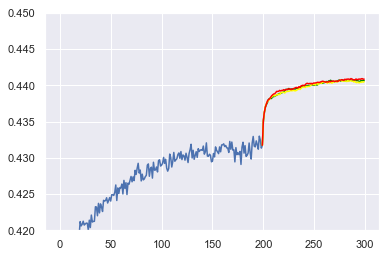

In [4]:
last_actor_score = actor_ndcg_data[-1]
ndcg_critic_data.insert(0, last_actor_score)
recall_critic_data.insert(0, last_actor_score)
ap_critic_data.insert(0, last_actor_score)

print(last_actor_score)
print(len(ndcg_critic_data))
print(len(ap_critic_data))
print(len(recall_critic_data))

plt.clf()
plt.plot(range(num_actor_datapoints), actor_ndcg_data)
plt.plot(range(num_actor_datapoints-1, num_actor_datapoints + num_critic_datapoints), ndcg_critic_data, color="green")
plt.plot(range(num_actor_datapoints-1, num_actor_datapoints + num_critic_datapoints), ap_critic_data, color="yellow")
plt.plot(range(num_actor_datapoints-1, num_actor_datapoints + num_critic_datapoints), recall_critic_data, color="red")
plt.ylim(0.42, 0.45)


Have 200 rows of data for ndcg


(0.65, 0.7)

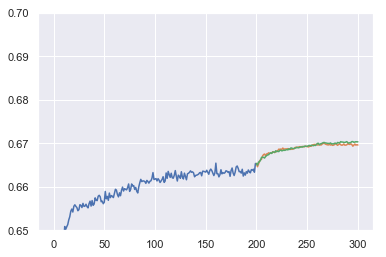

In [5]:
# Now, the same for other measurements!

actor_ndcg_data = data_base['ACTOR']['recall']
ndcg_critic_data = data_ndcg_critic['AC']['recall']
# ap_critic_data = data_ap_critic['AC']['ndcg']
recall_critic_data = data_recall_critic['AC']['recall']

last_actor_score = actor_ndcg_data[-1]
ndcg_critic_data.insert(0, last_actor_score)
recall_critic_data.insert(0, last_actor_score)


print("Have {} rows of data for ndcg".format(len(actor_ndcg_data)))
# print("For others, have {} {} {}".format(len(ndcg_critic_data), len(ap_critic_data), len(recall_critic_data)))

# assert len(ndcg_critic_data) == len(ap_critic_data) == len(recall_critic_data)

assert len(ndcg_critic_data) == len(recall_critic_data)

num_actor_datapoints = len(actor_ndcg_data)
num_critic_datapoints = len(ndcg_critic_data)

# Now, we plot again
plt.clf()
plt.plot(range(num_actor_datapoints), actor_ndcg_data)
plt.plot(range(num_actor_datapoints, num_actor_datapoints + num_critic_datapoints), ndcg_critic_data)
# plt.plot(range(num_actor_datapoints, num_actor_datapoints + num_critic_datapoints), ap_critic_data)
plt.plot(range(num_actor_datapoints, num_actor_datapoints + num_critic_datapoints), recall_critic_data)
plt.ylim(0.65, 0.7)


Have 150 rows of data for ndcg
0.20611420273780823
0.21344880759716034
0.21373681724071503


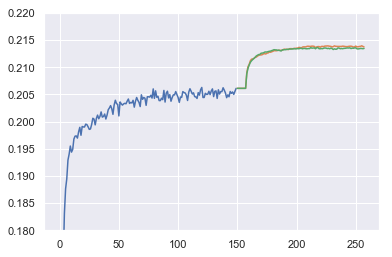

In [20]:
# Now, the same for other measurements!

actor_ndcg_data = data_base['ACTOR']['ap']
ndcg_critic_data = data_ndcg_critic['AC']['ap']
# ap_critic_data = data_ap_critic['AC']['ndcg']
recall_critic_data = data_recall_critic['AC']['ap']

last_actor_score = actor_ndcg_data[-1]
ndcg_critic_data.insert(0, last_actor_score)
recall_critic_data.insert(0, last_actor_score)


print("Have {} rows of data for ndcg".format(len(actor_ndcg_data)))
# print("For others, have {} {} {}".format(len(ndcg_critic_data), len(ap_critic_data), len(recall_critic_data)))

# assert len(ndcg_critic_data) == len(ap_critic_data) == len(recall_critic_data)

assert len(ndcg_critic_data) == len(recall_critic_data)

num_actor_datapoints = len(actor_ndcg_data)
num_critic_datapoints = len(ndcg_critic_data)

# Now, we plot again
plt.clf()
plt.plot(range(num_actor_datapoints), actor_ndcg_data)
plt.plot(range(num_actor_datapoints, num_actor_datapoints + num_critic_datapoints), ndcg_critic_data)
# plt.plot(range(num_actor_datapoints, num_actor_datapoints + num_critic_datapoints), ap_critic_data)
plt.plot(range(num_actor_datapoints, num_actor_datapoints + num_critic_datapoints), recall_critic_data)
plt.ylim(0.18, 0.22)

print(actor_ndcg_data[-1])
print(recall_critic_data[-1])
print(ndcg_critic_data[-1])